# Objective(s):
* This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

# Intended Learning Outcomes (ILOs):
* Demonstrate how to solve regression problems using simple linear regression
* Use the linear regression model to predict the target value


# Resources:
* Jupyter Notebook

# Files:
* Life Expectancy Data.csv  

# Submission Requirements:

* PDF containing initial EDA and Data Wrangling
* PDF showing demonstration of simple linear regression.
* Submit a link to the colab file through the comment section.

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [ ]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
y = df['Life expectancy ']
X = df.drop('Adult Mortality', axis=1)

In [ ]:
df = df.dropna()

In [ ]:
sns.pairplot(df)
plt.show()

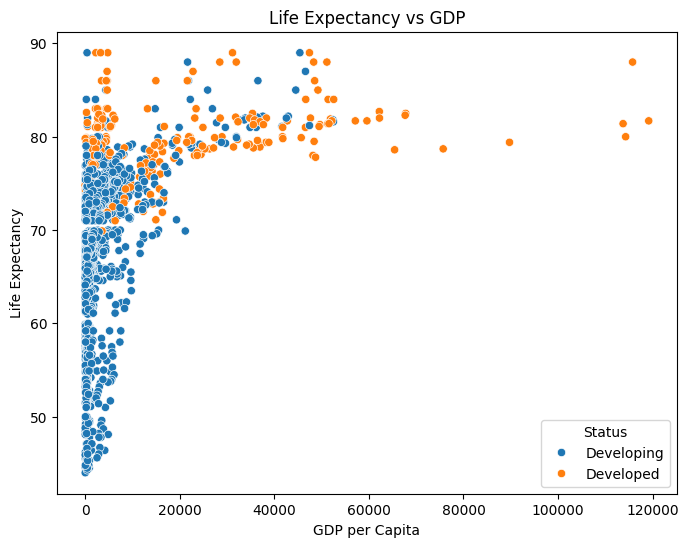

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy', hue='Status')
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

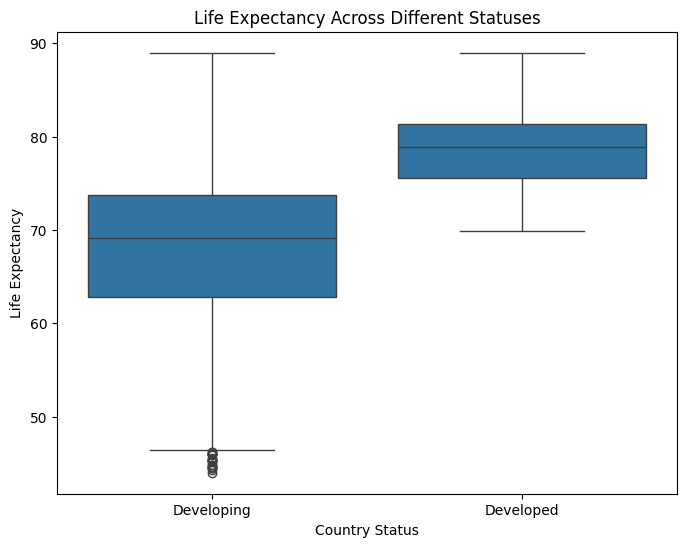

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.title('Life Expectancy Across Different Statuses')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()

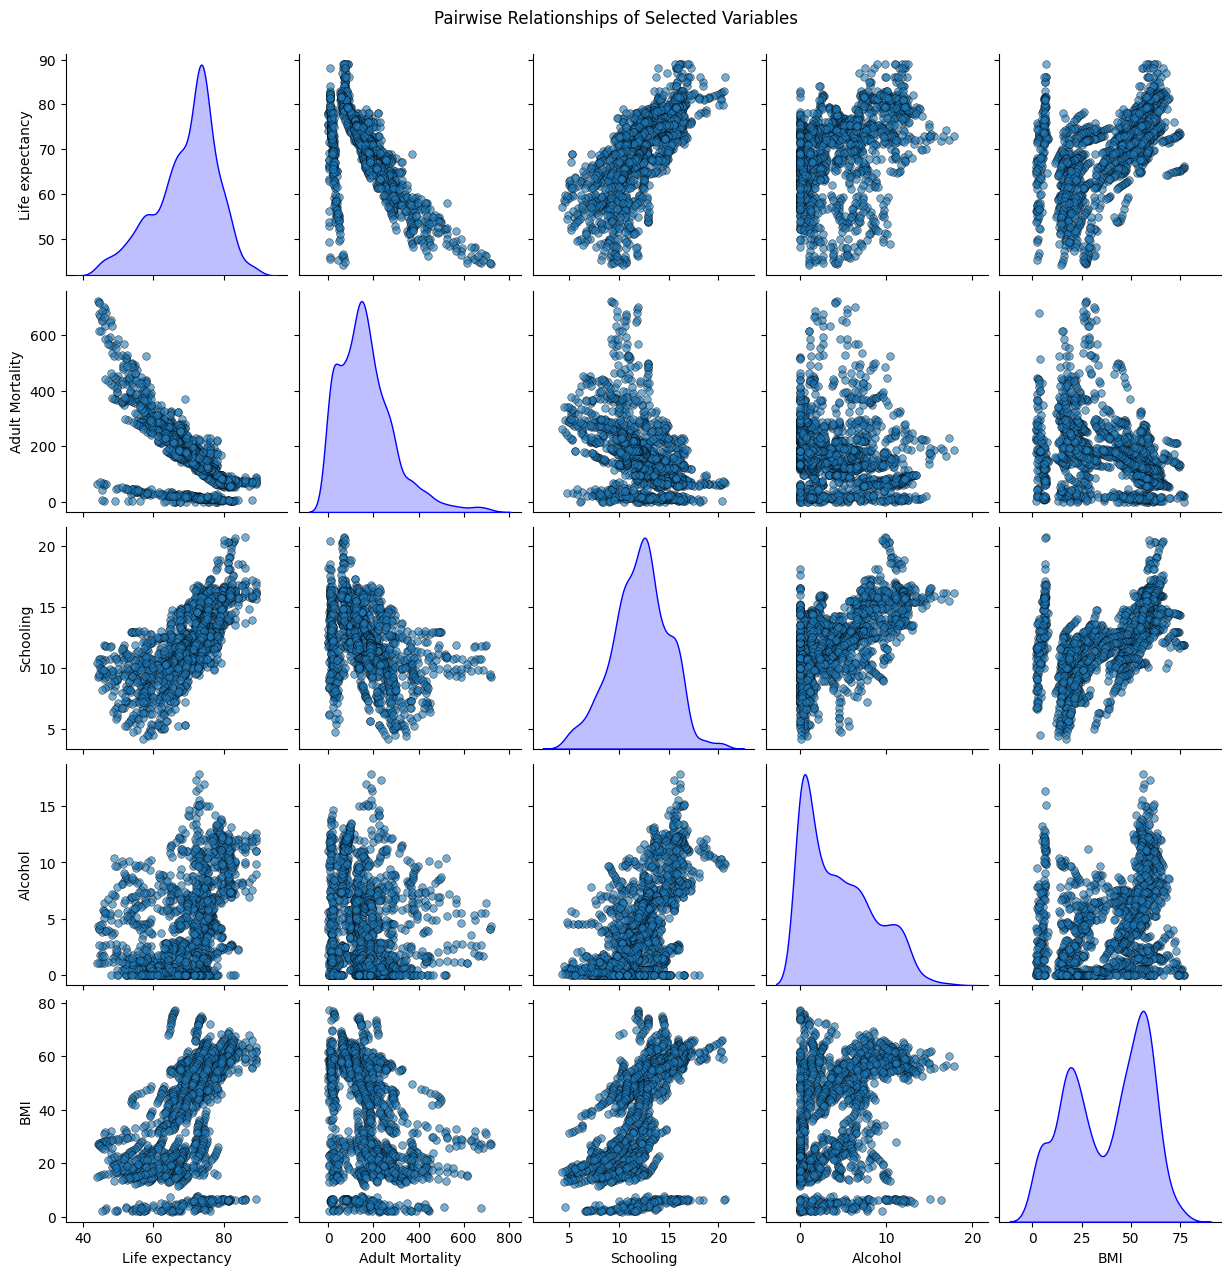

In [ ]:
selected_columns = ['Life expectancy', 'Adult Mortality', 'Schooling', 'Alcohol', 'BMI']

sns.pairplot(df[selected_columns], diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
             diag_kws={'color': 'blue'})
plt.suptitle('Pairwise Relationships of Selected Variables', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

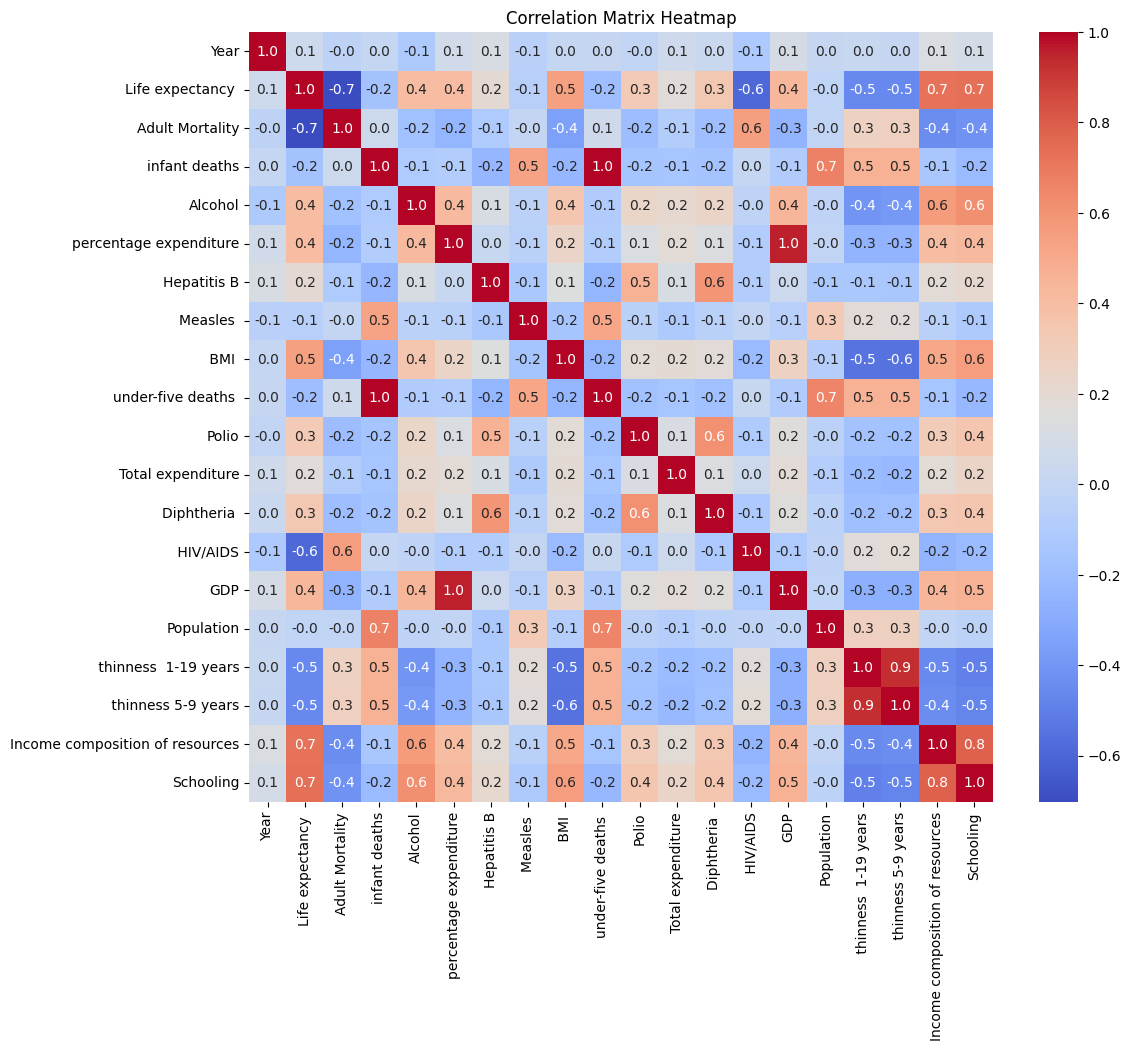

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
df.columns = df.columns.str.strip()

y = df['Life expectancy']
X = df.drop(['Life expectancy', 'Adult Mortality'], axis=1).select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients:', lm.coef_)

Coefficients: [-1.44674022e-01  1.12324315e-01 -1.72165941e-01  4.66604563e-04
 -5.40614359e-03 -9.19875192e-06  3.38352632e-02 -8.33715848e-02
  1.05688550e-02  1.26770393e-01  1.36349857e-02 -5.93219052e-01
  1.21654847e-05 -2.18271977e-10 -4.56813316e-03 -1.01343716e-01
  1.11395554e+01  1.12229857e+00]


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[69.71314639 72.94112919 80.80543867 56.62310998 54.19779443 53.09216089
 71.51690024 74.46003559 78.88801136 71.70663692 73.48290385 75.84375842
 77.40486436 68.63950348 67.03262903 71.76605451 78.27629797 80.96828161
 75.35415435 70.811055   79.27778183 71.80831356 70.99907764 73.99120725
 66.65940874 73.79250878 75.58879266 75.40798586 80.60893313 70.3370901
 61.80332735 63.61730885 71.41192563 80.93202329 76.19601845 78.84860508
 63.32936235 48.20318247 70.83549205 80.05081629 62.25083333 75.83947419
 72.68644102 70.59070534 76.56019865 63.72810677 73.39027407 59.0188955
 68.75018866 73.14510958 63.24710312 67.12915853 59.28468056 72.11614335
 75.16244271 56.50676163 75.24129343 75.52035548 72.26184231 62.06397474
 54.5148877  60.66394638 69.3792825  71.73606243 71.20130277 75.01336154
 60.73935894 74.62367238 78.5947477  68.54716921 71.88485555 61.09896338
 56.24089179 59.08161669 74.05241674 74.26693251 66.32903454 59.17315878
 77.97029303 81.51400162 70.09587724 73.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.0436393584103296
MSE: 15.079734201230751
RMSE: 3.883263344306017


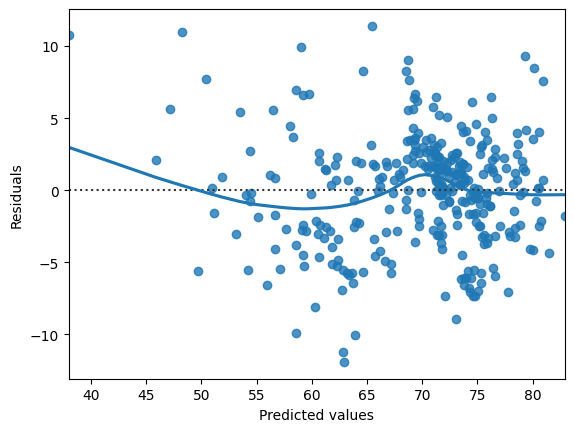

In [ ]:
sns.residplot(x=predictions, y=y_test, lowess=True)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Conclusion

My data analysis that particularly through histograms, scatter plots, and pair plots. These visualizations highlighted the significant influence of economic factors, where GDP correlated positively with life expectancy, suggesting that higher economic prosperity generally leads to better health outcomes. I also examined health and lifestyle variables like 'Alcohol' consumption and 'Adult Mortality', which indicated that lifestyle choices significantly impact health. Overall, the analysis underscored the complex interplay of socioeconomic factors and personal habits in determining life expectancy, providing a comprehensive overview of the factors that contribute to health outcomes across different populations.